# Problem 1

$$ p(x | \theta) = \int q(z) ln(p(x , z | \theta)) dz - \int q(z) ln(q(z)) dz + KL(q(z) || p(z | x, \theta)) $$

$$ p(x_i) = \sum_{k = 1}^K \omega_k N(x_i | \mu _k, \Sigma_k) $$

On itteration t we have:

E_step:

$$ \gamma^{t + 1}_{i,j} = p(z | x, \theta) = \frac{\omega_j N(x_i | \mu_j, \Sigma_j)}{ \sum_{k = 1}^K \omega_k N(x_i | \mu _k, \Sigma_k)} $$

M_step:

$$ p(x | \theta) = E_{q_{t+1}(z)} ln(p(x, z | \theta)) - E_{q_{t+1}(z)} ln(q_{t+1}(z)) $$
$$ p(x, z | \theta) = p(x | z, \theta) p(z) $$
$$ p(x | \theta) = E_{q_{t+1}(z)} ln(p(x| z, \theta)) = \sum_{i = 1} ^N \sum_{j = 1} ^ K \gamma^{t+1}_{i, j} (ln( \omega_j) - \frac{N}{2}ln(2\pi) - \frac{1}{2}ln(|\Sigma_j|) - \frac{1}{2} (x_i - \mu_j)^T\Sigma^{-1}(x_i - \mu_j)) $$

$$ \frac{\partial p(x | \theta) }{\partial \mu_k} = 0 $$

Thus:

$$ \mu_k^{t+1} = \frac{\sum_{i = 1}^{N} \gamma^{t+1}_{i, k} x_i}{\sum_{i = 1}^{N} \gamma^{t+1}_{i, k}} $$

$$ \frac{\partial p(x | \theta) }{\partial \Sigma_k} = 0 $$

Thus:

$$ \Sigma_k^{t+1} = \frac{\sum_{i = 1}^{N} \gamma^{t+1}_{i, k} (x_i - \mu^{t+1}_j)(x_i - \mu^{t+1}_j)^T}{\sum_{i = 1}^{N} \gamma^{t+1}_{i, k}} $$

# Problem 2

A) $$ q(z = \gamma_{i, j}) = \frac{N_k}{N} $$

$$ \mu_k^{t+1} = \frac{\sum_{i = 1}^{N} \gamma^{t+1}_{i, k} x_i}{\sum_{i = 1}^{N} \gamma^{t+1}_{i, k}} $$
$$ \Sigma_k^{t+1} = \frac{\sum_{i = 1}^{N} \gamma^{t+1}_{i, k} (x_i - \mu^{t+1}_j)(x_i - \mu^{t+1}_j)^T}{\sum_{i = 1}^{N} \gamma^{t+1}_{i, k}} $$

B)

$$ \mu_k^{t+1} = \frac{\sum_{i = 1}^{N} \gamma^{t+1}_{i, k} x_i}{\sum_{i = 1}^{N} \gamma^{t+1}_{i, k}} $$
$$ \Sigma^{t+1}_k = I $$

C)

$$ 
\gamma^{t+1}_{i, k} = 
\begin{cases}
   1 &\text{if}&z = z_0\\
   0 &\text{otherwise}
 \end{cases}\\
$$

# Problem 3

In K-means objective function is:

$$ J = \sum_{n = 1}^{N} \sum_{k = 1}^K r_{nk} || x_n - \mu_k ||^2 $$
$$ r_{nk} \in \{ 0, 1 \} $$

Then there are two steps:

The first one with fixed $\mu$ we assign for every point the nearest class according to: 
$$ r_{nk} = 
\begin{cases}
    1 & \text{if} k = argmin_j ||x_n - \mu_j||^2\\
    0 & \text{otherwise}
\end{cases}
$$

Then we recalculate the cluster means as:
$$
m_k^{t+1} = \frac{ \sum_{i = 1}^{N} r_{ik} x_i } {\sum_{i = 1}^{N} r_{ik} }
$$

Hence, as in problem 2c we have:
$\gamma_{ik} = r_{nk}$, where for $x_i$ we are searching for the most probable cluster $\max_z p(z|x, \theta)$.

# Problem 5

KMeans is local optimisation method. EM tryes to avoid going to local optimum.
K-means only works on spherical classes
KMeans is faster due to more easy formulas
KMeans cannot deal with ubalanced classes
SoftKMeans avoids this problem, but deals also only with spherical classes

In [22]:
import numpy as np
import sklearn
from sklearn.cluster import KMeans
from sklearn import datasets
import matplotlib
matplotlib.use('Qt4Agg')
import matplotlib.pyplot as plt
%matplotlib inline

from utils import compute_labels, log_likelihood, log_likelihood_from_labels
import clustering

# Automatically reload imports.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Load and plot the data.

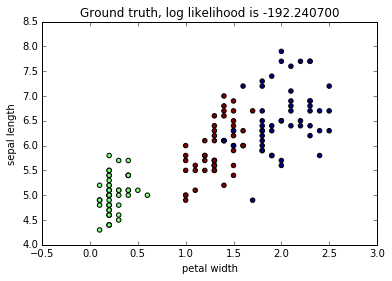

In [169]:
iris = datasets.load_iris()
# Leave just two features of the Iris dataset to simplify plotting and debugging.
X = iris.data[:, [3, 0]]
y = iris.target

# Plot ground truth and its log-likelihood.
y = np.choose(y, [1, 2, 0]).astype(np.float)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
plt.title('Ground truth, log likelihood is %f' % log_likelihood_from_labels(X, y))

# K-Means from sklearn

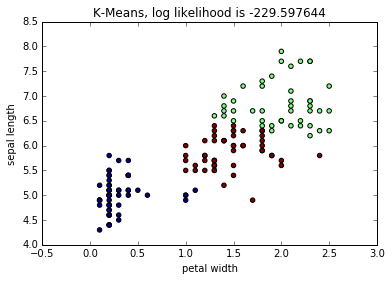

In [3]:
# Reproducibility.
np.random.seed(0)
est = sklearn.cluster.KMeans(n_clusters=3)
est.fit(X)
y = est.labels_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
plt.title('K-Means, log likelihood is %f' % log_likelihood_from_labels(X, y))

# Example implementation of random clusterer.

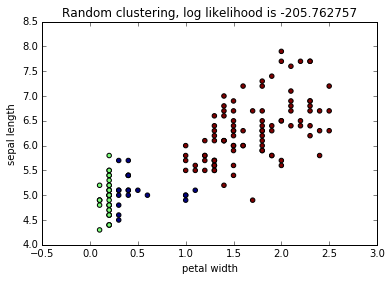

In [4]:
# Reproducibility.
np.random.seed(2)
est = clustering.Random(n_clusters=3)
est.fit(X)
y = est.labels_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
plt.title('Random clustering, log likelihood is %f' % log_likelihood_from_labels(X, y))

# EM algorithm

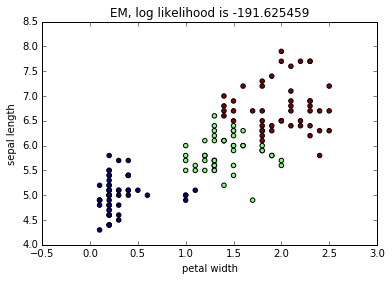

In [170]:
#####################################################################
# To run it, implement your own EM-algorithm class in clustering.py #
#####################################################################
%matplotlib inline
np.random.seed(0)
est = clustering.EM(n_clusters=3, max_iter=100, logging = True)
est.fit(X)
y = est.labels_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
ll = log_likelihood(X, est.w_, est.cluster_centers_, est.covars_)
plt.title('EM, log likelihood is %f' % ll)

# Convergence

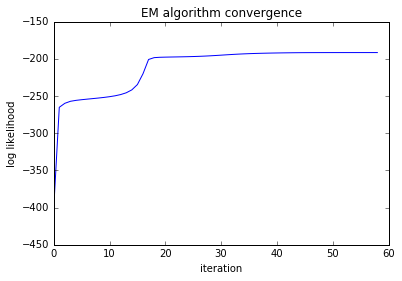

In [171]:
plt.plot(est.logs['log_likelihood'])
plt.xlabel('iteration')
plt.ylabel('log likelihood')
plt.title('EM algorithm convergence')

In [ ]:
%matplotlib qt

import matplotlib.pylab as plt
import numpy as np
import matplotlib.animation as animation

fig = plt.figure()
ax = fig.add_subplot(111)
scat = ax.scatter(X[:, 0], X[:, 1], c=est.logs['labels'][0])
mu_labels = np.unique(est.logs['labels'][0])
mu_scat = ax.scatter(est.logs['mu'][0][:, 0], est.logs['mu'][0][:, 1], c=mu_labels, marker='x', s=50)
ax.set_xlabel('petal width')
ax.set_ylabel('sepal length')

def update_line(num):
    scat.set_array(est.logs['labels'][num])
    ll = log_likelihood(X, est.logs['w'][num], est.logs['mu'][num], est.logs['sigma'][num])
    mu_scat.set_offsets(est.logs['mu'][num])
    
    ax.set_title('EM, iter %d, log likelihood is %f' % (num, ll))
    return scat,# mu_scat

line_ani = animation.FuncAnimation(fig, update_line, len(est.logs['labels']),
    interval=1000, blit=False)

plt.show()

In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause
%matplotlib qt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets

np.random.seed(3)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_3': sklearn.cluster.KMeans(n_clusters=3, max_iter=15),
              'k_means_8': sklearn.cluster.KMeans(n_clusters=8, max_iter=15),
              'em_iris_3': clustering.EM(n_clusters=3, n_init=100, max_iter=15),
              'rand_iris_3': clustering.Random(n_clusters=3),}


fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    if hasattr(est, 'covars_'):
        ll = log_likelihood(X, est.w_, est.cluster_centers_, est.covars_)
    else:
        ll = log_likelihood_from_labels(X, labels)
    ax.set_title('%s, %f' % (name, ll))
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground truth, %f' % log_likelihood_from_labels(X, y))
plt.show()

# SoftKMeans

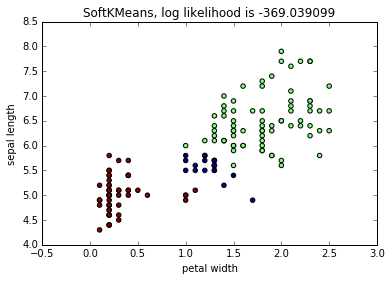

In [173]:
np.random.seed(0)
est = clustering.SoftKMeans(n_clusters = 3, max_iter = 100, n_init = 10, logging = True)
est.fit(X)
y = est.labels_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
ll = log_likelihood(X, est.w_, est.cluster_centers_, est.covars_)
plt.title('SoftKMeans, log likelihood is %f' % ll)

# Convergence

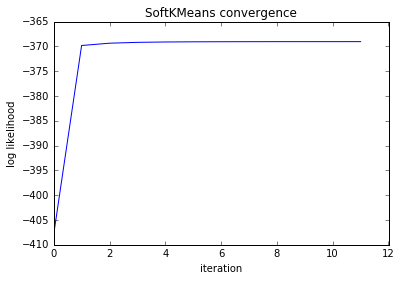

In [174]:
plt.plot(est.logs['log_likelihood'])
plt.xlabel('iteration')
plt.ylabel('log likelihood')
plt.title('SoftKMeans convergence')

# KMeans

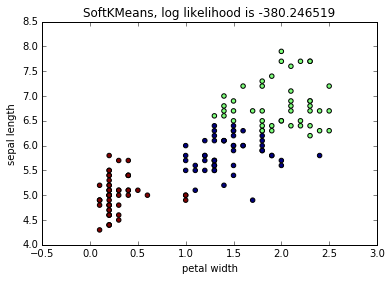

In [175]:
np.random.seed(0)
est = clustering.KMeans(n_clusters = 3, max_iter = 100, n_init = 10, logging = True)
est.fit(X)
y = est.labels_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('petal width')
plt.ylabel('sepal length')
ll = log_likelihood(X, est.w_, est.cluster_centers_, est.covars_)
plt.title('SoftKMeans, log likelihood is %f' % ll)

# Convergence

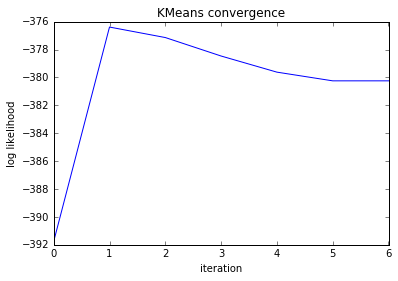

In [176]:
plt.plot(est.logs['log_likelihood'])
plt.xlabel('iteration')
plt.ylabel('log likelihood')
plt.title('KMeans convergence')

# Problems 6 and 7

Spherical balanced classes are good for all the methods.

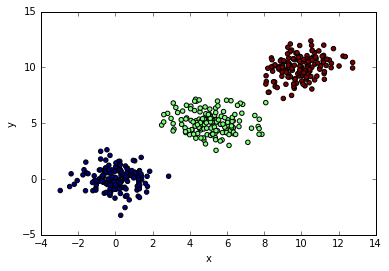

In [186]:
class_sizes = [150, 150, 150]
mu = [(0, 0), (5, 5), (10, 10)] 
X = np.zeros((np.sum(class_sizes), 2))
y = []

for index, size in enumerate(class_sizes):
    start_index = int(np.sum(class_sizes[:index]))
    end_index = start_index + size
    X[start_index : end_index, :] = np.random.multivariate_normal(mu[index], np.eye(2), size)
    y.extend([index] * size)

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

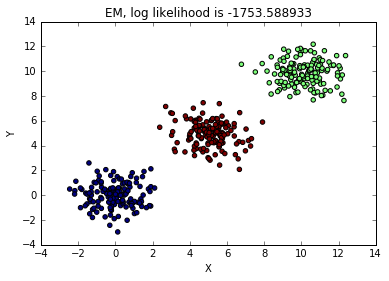

In [178]:
est = clustering.EM(n_clusters=3, max_iter=100, logging = False)
est.fit(X)
y = est.labels_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X')
plt.ylabel('Y')
ll = log_likelihood(X, est.w_, est.cluster_centers_, est.covars_)
plt.title('EM, log likelihood is %f' % ll)

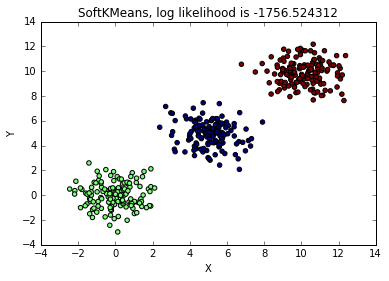

In [179]:
est = clustering.SoftKMeans(n_clusters=3, max_iter=100, logging = False)
est.fit(X)
y = est.labels_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X')
plt.ylabel('Y')
ll = log_likelihood(X, est.w_, est.cluster_centers_, est.covars_)
plt.title('SoftKMeans, log likelihood is %f' % ll)

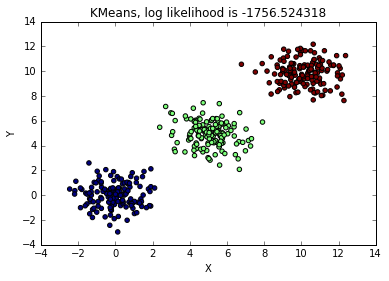

In [180]:
est = clustering.KMeans(n_clusters=3, max_iter=100, logging = False)
est.fit(X)
y = est.labels_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X')
plt.ylabel('Y')
ll = log_likelihood(X, est.w_, est.cluster_centers_, est.covars_)
plt.title('KMeans, log likelihood is %f' % ll)

Let's use unbalanced clusters

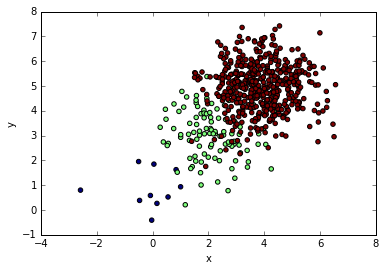

In [192]:
class_sizes = [10, 100, 500]
mu = [(0, 1), (2, 3), (4, 5)] 
X = np.zeros((np.sum(class_sizes), 2))
y = []

for index, size in enumerate(class_sizes):
    start_index = int(np.sum(class_sizes[:index]))
    end_index = start_index + size
    X[start_index : end_index, :] = np.random.multivariate_normal(mu[index], np.eye(2), size)
    y.extend([index] * size)

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

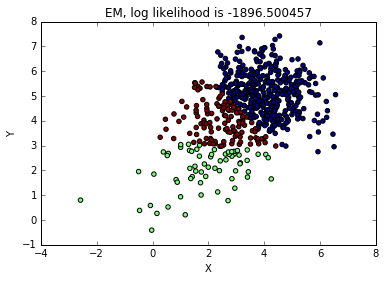

In [193]:
est = clustering.EM(n_clusters=3, max_iter=100, logging = False)
est.fit(X)
y = est.labels_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X')
plt.ylabel('Y')
ll = log_likelihood(X, est.w_, est.cluster_centers_, est.covars_)
plt.title('EM, log likelihood is %f' % ll)

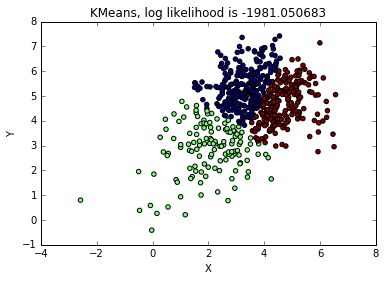

In [194]:
est = clustering.KMeans(n_clusters=3, max_iter=100, logging = False)
est.fit(X)
y = est.labels_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X')
plt.ylabel('Y')
ll = log_likelihood(X, est.w_, est.cluster_centers_, est.covars_)
plt.title('KMeans, log likelihood is %f' % ll)

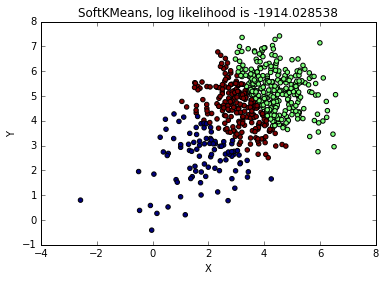

In [195]:
est = clustering.SoftKMeans(n_clusters=3, max_iter=100, logging = False)
est.fit(X)
y = est.labels_

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X')
plt.ylabel('Y')
ll = log_likelihood(X, est.w_, est.cluster_centers_, est.covars_)
plt.title('SoftKMeans, log likelihood is %f' % ll)